图片处理之滤波
===

# 7.微分滤波器
微分滤波器对图像亮度急剧变化的边缘有提取效果，可以获得邻接像素的差值。纵向使用$\begin{bmatrix}
0&-1&0 \\
0&1&0 \\
0&0&0
\end{bmatrix}$，横向使用$\begin{bmatrix}
0&0&0 \\
-1&1&0 \\
0&0&0
\end{bmatrix}$

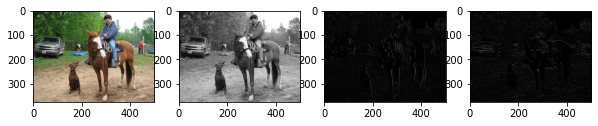

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread("data/02.jpg")

b = image[:, :, 0].copy()
g = image[:, :, 1].copy()
r = image[:, :, 2].copy()
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

#region filter
H,W = gray.shape
k_size = 3
pad = k_size//2
out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
out[pad : pad + H, pad : pad + W] = gray.copy().astype(np.float)
tmp = out.copy()

out_v = out.copy()
out_h = out.copy()

kv = [[0., -1., 0.], [0., 1., 0.], [0., 0., 0.]]
kh = [[0., 0., 0.], [-1., 1., 0.], [0., 0., 0.]]

for y in range(H):
    for x in range(W):
        out_v[pad + y, pad + x] = np.sum(kv * (tmp[y : y+k_size, x : x+k_size]))
        out_h[pad + y, pad + x] = np.sum(kh * (tmp[y : y+k_size, x : x+k_size]))

out_v = np.clip(out_v, 0, 255)
out_h = np.clip(out_h, 0, 255)

out_v = out_v[pad: pad + H, pad: pad + W].astype(np.uint8)
out_h = out_h[pad: pad + H, pad: pad + W].astype(np.uint8)
#endregion filter

plt.figure(figsize=(10,8), facecolor='white')
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(out_h, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(out_v, cv2.COLOR_BGR2RGB))


# 8.Sobel滤波器

Sobel滤波器可以提取特定方向的边缘，定义如下：

纵向$\begin{bmatrix}
1&2&1 \\
0&0&0 \\
-1&-2&-1
\end{bmatrix}$，横向$\begin{bmatrix}
1&0&-1 \\
2&0&-2 \\
1&0&-1
\end{bmatrix}$

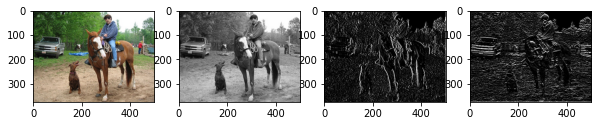

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread("data/02.jpg")

b = image[:, :, 0].copy()
g = image[:, :, 1].copy()
r = image[:, :, 2].copy()
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

#region filter
H,W = gray.shape
k_size = 3
pad = k_size//2
out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
out[pad : pad + H, pad : pad + W] = gray.copy().astype(np.float)
tmp = out.copy()

out_v = out.copy()
out_h = out.copy()

kv = [[1., 2., 1.], [0., 0., 0.], [-1., -2., -1.]]
kh = [[1., 0., -1.], [2., 0., -2.], [1., 0., -1.]]

for y in range(H):
    for x in range(W):
        out_v[pad + y, pad + x] = np.sum(kv * (tmp[y : y+k_size, x : x+k_size]))
        out_h[pad + y, pad + x] = np.sum(kh * (tmp[y : y+k_size, x : x+k_size]))

out_v = np.clip(out_v, 0, 255)
out_h = np.clip(out_h, 0, 255)

out_v = out_v[pad: pad + H, pad: pad + W].astype(np.uint8)
out_h = out_h[pad: pad + H, pad: pad + W].astype(np.uint8)
#endregion filter

plt.figure(figsize=(10,8), facecolor='white')
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(out_h, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(out_v, cv2.COLOR_BGR2RGB))

# 9.Prewitt滤波器

Prewitt滤波器适用于边缘检测的一种滤波器，定义如下:

纵向$\begin{bmatrix}
-1&-1&-1 \\
0&0&0 \\
1&1&1
\end{bmatrix}$，横向$\begin{bmatrix}
-1&0&-1 \\
-1&0&1 \\
-1&0&1
\end{bmatrix}$

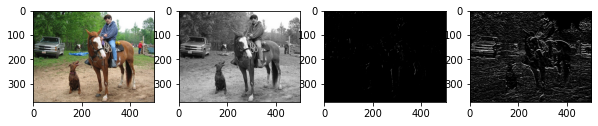

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread("data/02.jpg")

b = image[:, :, 0].copy()
g = image[:, :, 1].copy()
r = image[:, :, 2].copy()
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

#region filter
H,W = gray.shape
k_size = 3
pad = k_size//2
out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
out[pad : pad + H, pad : pad + W] = gray.copy().astype(np.float)
tmp = out.copy()

out_v = out.copy()
out_h = out.copy()

kv = [[-1., -1., -1.], [0., 0., 0.], [1., 1., 1.]]
kh = [[-1., 0., -1.], [-1., 0., 1.], [-1., 0., 1.]]

for y in range(H):
    for x in range(W):
        out_v[pad + y, pad + x] = np.sum(kv * (tmp[y : y+k_size, x : x+k_size]))
        out_h[pad + y, pad + x] = np.sum(kh * (tmp[y : y+k_size, x : x+k_size]))

out_v = np.clip(out_v, 0, 255)
out_h = np.clip(out_h, 0, 255)

out_v = out_v[pad: pad + H, pad: pad + W].astype(np.uint8)
out_h = out_h[pad: pad + H, pad: pad + W].astype(np.uint8)
#endregion filter

plt.figure(figsize=(10,8), facecolor='white')
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(out_h, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(out_v, cv2.COLOR_BGR2RGB))